In [5]:
import pandas as pd

In [9]:
data1={
    'EmployeeID':[101,102,103,104],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Department':['HR','IT','Finance','Marketing']
}
df1=pd.DataFrame(data1)

data2={
    'EmployeeID':[102,103,105],
    'Salary':[60000,70000,80000]
}
df2=pd.DataFrame(data2)

In [10]:
df1

,EmployeeID,Name,Department
0,101,Alice,HR
1,102,Bob,IT
2,103,Charlie,Finance
3,104,David,Marketing


In [11]:
df2

,EmployeeID,Salary
0,102,60000
1,103,70000
2,105,80000


#### inner outer left right self

In [12]:
df1.merge(df2,how='inner',on='EmployeeID') #duita ko common haru join hunxa

,EmployeeID,Name,Department,Salary
0,102,Bob,IT,60000
1,103,Charlie,Finance,70000


In [13]:
df1.merge(df2,how='left',on='EmployeeID') #left(df1) ko sabai aauxa and common ni aauxa

,EmployeeID,Name,Department,Salary
0,101,Alice,HR,NaN
1,102,Bob,IT,60000.0
2,103,Charlie,Finance,70000.0
3,104,David,Marketing,NaN


In [14]:
df1.merge(df2,how='right',on='EmployeeID') #common plus right(df2)ma vako all

,EmployeeID,Name,Department,Salary
0,102,Bob,IT,60000
1,103,Charlie,Finance,70000
2,105,NaN,NaN,80000


In [15]:
df1.merge(df2,how='outer',on='EmployeeID') #like union

,EmployeeID,Name,Department,Salary
0,101,Alice,HR,NaN
1,102,Bob,IT,60000.0
2,103,Charlie,Finance,70000.0
3,104,David,Marketing,NaN
4,105,NaN,NaN,80000.0


In [16]:
courses=pd.read_csv(r"C:\Users\DELL\Desktop\Sipalaya Data Science\datas\reg-month1\courses.csv")
students=pd.read_csv(r"C:\Users\DELL\Desktop\Sipalaya Data Science\datas\reg-month1\students.csv")
nov=pd.read_csv(r"C:\Users\DELL\Desktop\Sipalaya Data Science\datas\reg-month1\reg-month1.csv")
dec=pd.read_csv(r"C:\Users\DELL\Desktop\Sipalaya Data Science\datas\reg-month1\reg-month2.csv")

In [20]:
courses
students
nov
dec

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9
5,7,7
6,7,2
7,16,3
8,17,10
9,11,8


### Total revenue generated

In [21]:
# concatenate nov and dec
nov.head(2)

,student_id,course_id
0,23,1
1,15,5


In [22]:
dec.head(2)

,student_id,course_id
0,3,5
1,16,7


In [23]:
pd.concat([nov,dec])

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [24]:
pd.concat([nov,dec],ignore_index=True)

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [28]:
temp_df=pd.concat([nov,dec],ignore_index=False,keys=['november','december'])

In [31]:
temp_df.loc['november']

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [36]:
temp_df.reset_index().merge(courses,how='inner',on='course_id')['price'].sum()

np.int64(154247)

### Month by month revenue

In [38]:
regs=pd.concat([nov,dec],keys=['nov','dec'])

<Axes: xlabel='level_0'>

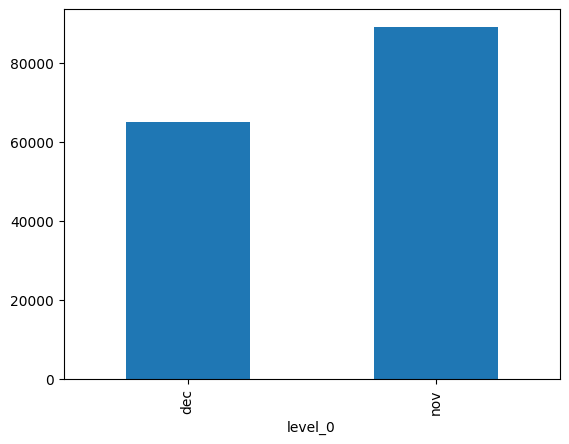

In [42]:
regs.reset_index().merge(courses,on='course_id').groupby('level_0')['price'].sum().plot(kind='bar')

### Courses that not any students enrolled

In [45]:
regs=pd.concat([nov,dec],ignore_index=True)

### Numpy

In [47]:
regs['course_id']
import numpy as np

In [49]:
np.array(regs['course_id'])

array([ 1,  5,  6,  4,  9,  1,  1,  8,  3,  1,  4,  6, 10,  7,  3,  4,  1,
        5,  3,  7,  6,  1,  2, 10,  3,  5,  7, 10,  1,  9,  7,  2,  3, 10,
        8,  6,  5,  7,  8, 10,  9,  5,  6,  5,  6,  9,  5,  4,  1, 10,  9,
        8,  1])

In [51]:
enrolled_courses=np.unique(np.array(regs['course_id']))

In [54]:
all_courses=np.array(courses['course_id'])

In [56]:
np.setdiff1d(all_courses,enrolled_courses)

array([11, 12])

In [58]:
courses[courses['course_id'].isin(np.setdiff1d(all_courses,enrolled_courses))]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


### Left join

In [61]:
temp_df=courses.merge(regs,on='course_id',how='left')

In [63]:
list(temp_df[temp_df.isna().any(axis=1)]['course_name'])

['Numpy', 'C++']

### Number of courses enrolled

<Axes: xlabel='course_name'>

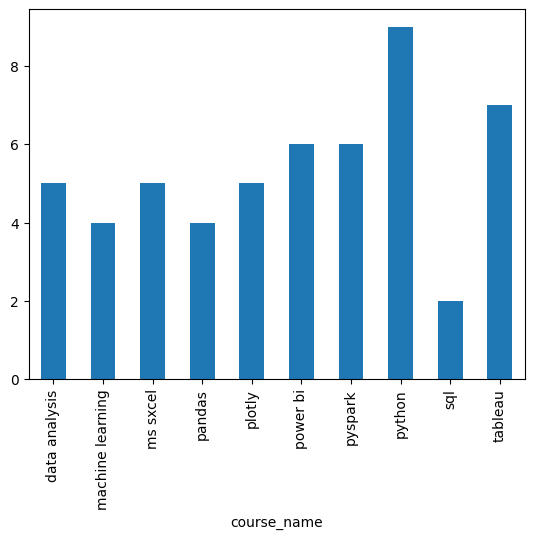

In [67]:
regs.merge(courses,on='course_id',how='inner').groupby('course_name')['price'].count().plot(kind='bar')

### Calculate each course revenue generated

In [69]:
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum()

course_name
data analysis       24995
machine learning    39996
ms sxcel             7995
pandas               4396
plotly               3495
power bi            11394
pyspark             14994
python              22491
sql                  6998
tableau             17493
Name: price, dtype: int64

<Axes: xlabel='course_name'>

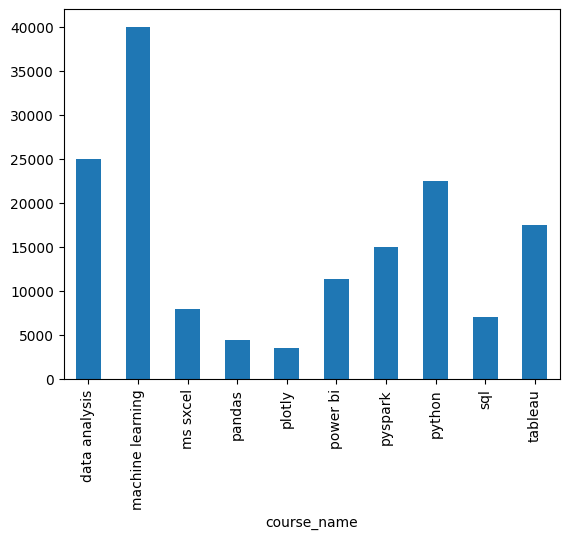

In [70]:
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

<Axes: xlabel='course_name'>

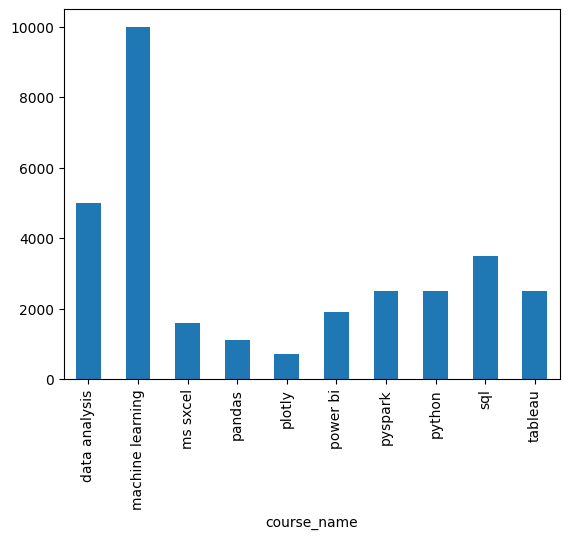

In [71]:
regs.merge(courses,on='course_id').groupby('course_name')['price'].mean().plot(kind='bar')

### Find the students who enrolled in both months

In [72]:
np.intersect1d(nov['student_id'],dec['student_id'])

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [75]:
students[students['student_id'].isin(np.intersect1d(nov['student_id'],dec['student_id']))]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


### Students who enrolled in more courses

<Axes: xlabel='name'>

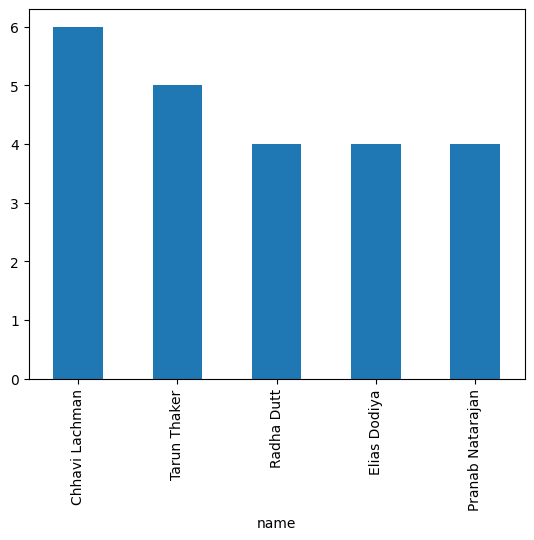

In [80]:
regs.merge(students,on='student_id').groupby('name')['partner'].count().sort_values(ascending=False).head().plot(kind='bar')